## Heart Disease Data - Classification

## Data Visualization 

In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

In [14]:
df = pd.read_csv('heart.csv')


In [15]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


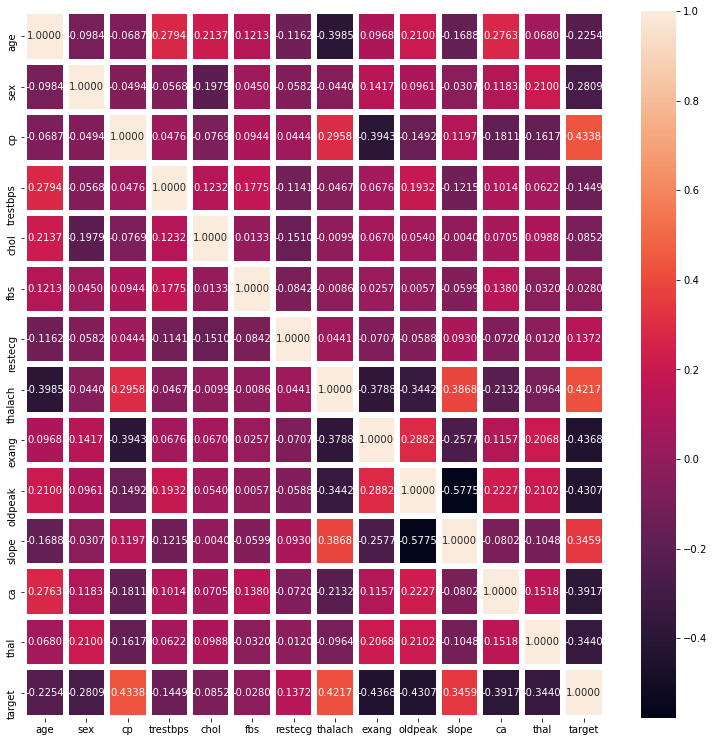

In [28]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df.corr(), annot=True, linewidths=5, fmt= '.4f',ax=ax)

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

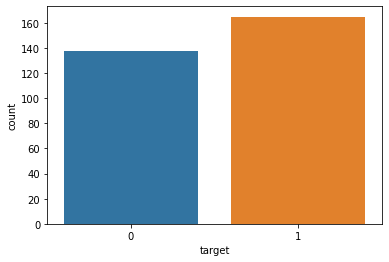

In [16]:
sns.countplot(df['target'])


## Classification (Using Logistic Regression)

In [74]:
data = pd.read_csv("heart.csv")


In [75]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
y =data.target.values
x1=data.drop(["target"],axis=1)

In [77]:
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values


In [78]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [79]:
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

In [80]:
def initializing_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [81]:
def forward_backwardpropogation(w,b,xtrain,y_train):
    #forward P.
    z = np.dot(w.T,xtrain) +  b 
    y_head = sigmoid(z)
    loss = -ytrain*np.log(y_head)-(1-ytrain)*np.log(1-y_head)
    cost = (np.sum(loss))/xtrain.shape[1]
    #backward p.
    derivative_weight = (np.dot(xtrain,((y_head-ytrain).T)))/xtrain.shape[1] 
    derivetive_bias = np.sum(y_head-ytrain)/xtrain.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivetive_bias": derivetive_bias}
    
    return cost,gradients

In [83]:
def update(w,b,xtrain, ytrain, learning_rate, number_of_iteration):
    costlist = []
    costlist2 = []
    index = []
    for i in range(number_of_iteration):
        cost,gradients = forward_backwardpropogation(w,b,xtrain,ytrain)
        costlist.append(cost)
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivetive_bias"]
        if i % 10 == 0:
            costlist2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
            
    parameters = {"weight": w, "bias":b}
    plt.plot(index,costlist2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, costlist

In [84]:
def predict(w,b,xtest):
    
    z =sigmoid(np.dot(w.T,xtest)+b)
    y_prediction = np.zeros((1,xtest.shape[1]))
    #if z > 0.5 predcition = 1 y_head=1
    #if z <= 0.5 prediciton = 0 y_head=0
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [86]:
def LogReg(xtrain,ytrain,xtest,ytest,learning_rate,number_of_iteration):
    dimension = xtrain.shape[0] 
    w,b=initializing_weights_and_bias(dimension)
    parameters,gradients,costlist = update(w,b,xtrain,ytrain,learning_rate,number_of_iteration)
    
    y_prediciton_test = predict(parameters["weight"],parameters["bias"],xtest)

    print("Test Accuracy:{} %".format(100-np.mean(np.abs(y_prediciton_test-ytest))*100))

Cost after iteration 0: 0.692516
Cost after iteration 10: 0.522652
Cost after iteration 20: 0.464812
Cost after iteration 30: 0.436631
Cost after iteration 40: 0.419664


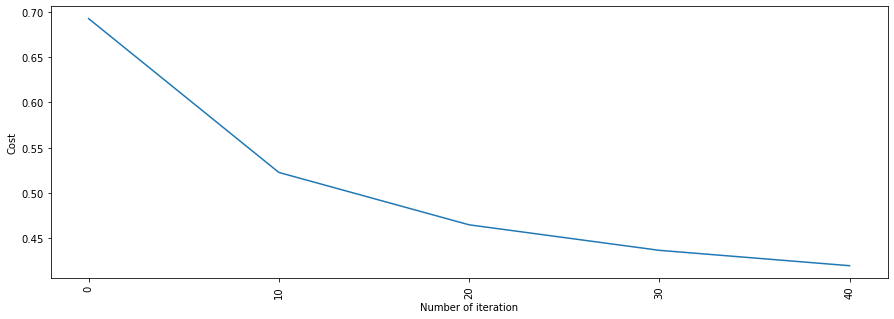

Test Accuracy:83.60655737704919 %


In [87]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =50 )

Cost after iteration 0: 0.692516
Cost after iteration 10: 0.522652
Cost after iteration 20: 0.464812
Cost after iteration 30: 0.436631
Cost after iteration 40: 0.419664
Cost after iteration 50: 0.408136
Cost after iteration 60: 0.399711
Cost after iteration 70: 0.393253
Cost after iteration 80: 0.388134
Cost after iteration 90: 0.383976


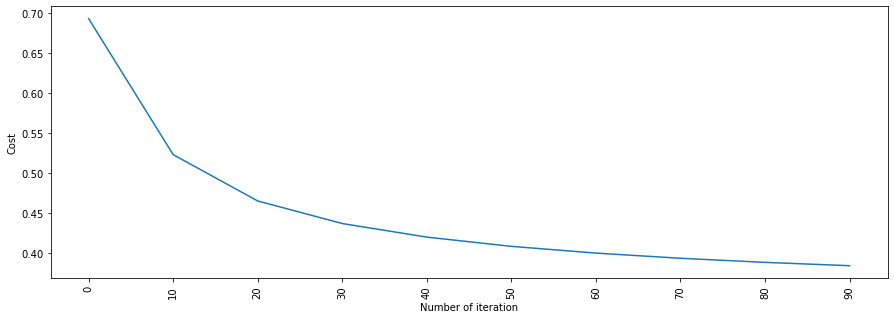

Test Accuracy:85.24590163934427 %


In [88]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =100 )

Cost after iteration 0: 0.692516
Cost after iteration 10: 0.522652
Cost after iteration 20: 0.464812
Cost after iteration 30: 0.436631
Cost after iteration 40: 0.419664
Cost after iteration 50: 0.408136
Cost after iteration 60: 0.399711
Cost after iteration 70: 0.393253
Cost after iteration 80: 0.388134
Cost after iteration 90: 0.383976
Cost after iteration 100: 0.380530
Cost after iteration 110: 0.377629
Cost after iteration 120: 0.375155
Cost after iteration 130: 0.373021
Cost after iteration 140: 0.371161
Cost after iteration 150: 0.369526
Cost after iteration 160: 0.368078
Cost after iteration 170: 0.366787
Cost after iteration 180: 0.365628
Cost after iteration 190: 0.364583
Cost after iteration 200: 0.363634
Cost after iteration 210: 0.362770
Cost after iteration 220: 0.361980
Cost after iteration 230: 0.361254
Cost after iteration 240: 0.360585
Cost after iteration 250: 0.359967
Cost after iteration 260: 0.359393
Cost after iteration 270: 0.358860
Cost after iteration 280: 0.358

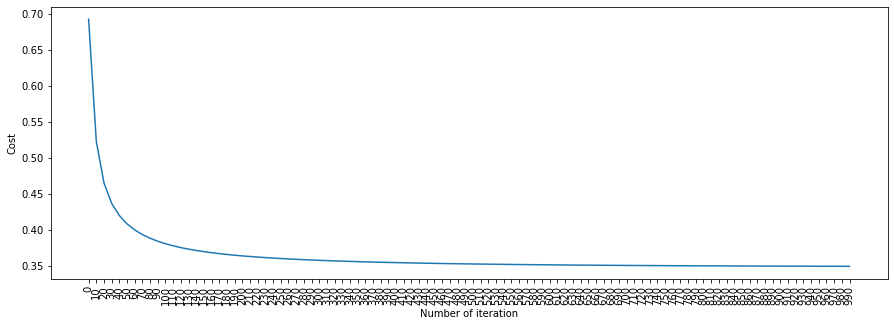

Test Accuracy:85.24590163934427 %


In [89]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =1000)

In [90]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain.T,ytrain.T)
print("Test Accuracy {}".format(LR.score(xtest.T,ytest.T))) 

Test Accuracy 0.8524590163934426


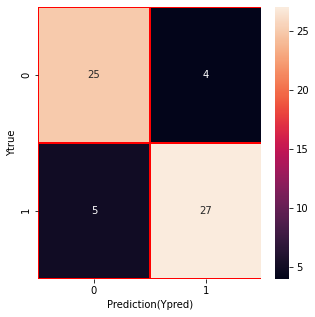

In [91]:

yprediciton= LR.predict(xtest.T)
ytrue = ytest.T

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

## Classification (Using K Nearest Neighbours)

In [29]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as pt
from matplotlib import rcParams
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import sklearn.metrics as met
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
x= df.iloc[:,0:13].values 
y= df['target'].values

In [34]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

Minimum error:- 0.13157894736842105 at K = 7


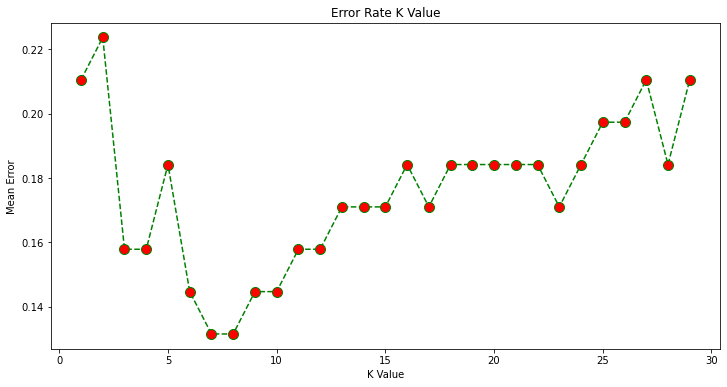

In [37]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [38]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred= classifier.predict(x_test)


In [66]:
accuracy_score(y_test, y_pred)


0.868421052631579

In [40]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)


In [41]:
cm


array([[26,  7],
       [ 3, 40]])

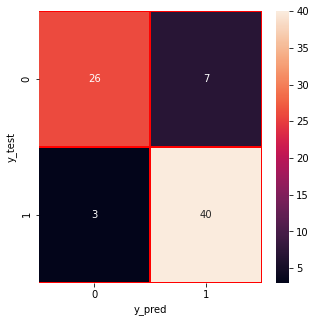

In [65]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()